<img src='Cover5-01.png'>

## Семинар 6. Различные постановки задачи

### Обучение по прецедентам

$X$--- множество объектов;  $Y$--- множество ответов;

$y\colon X\to Y$ --- неизвестная зависимость (target function).

**Дано:**

$\{x_1,\dots,x_\ell\} \subset X$ --- \emph{обучающая выборка} (training sample);

$y_i = y(x_i)$;   $i=1,\dots,\ell$ --- известные ответы.

**Найти:**

$a\colon X\to Y$ --- алгоритм, решающую функцию (decision function),
приближающую $y$ на~всём множестве~$X$.

### Постановки задачи

До сих пор мы рассматривали следующие постановки задачи:

- классификации
- регрессии
- анализ и прогнозирование временных рядов

Причем постановки нам были даны однозначно и заранее. В некоторых (довольно нередких) случаях полезно рассмотреть различные возможные постановки задачи.

In [1]:
import numpy as np
from datetime import datetime, timedelta
import pylab
import matplotlib.pyplot as plt
import pandas as pd
import math
import pandas.tseries.offsets as ofs
import scipy as sc
from sklearn.linear_model import LinearRegression, LogisticRegression

%matplotlib inline

In [2]:
# Quality functions
def qualitySSE(x,y):
    # Sum squared error
    # x - real values
    # y - forecasts
    return ((x-y)**2).sum(), (x-y)**2

def qualityMSE(x,y):
    # Mean squared error
    # x - real values
    # y - forecasts
    return ((x-y)**2).mean()

def qualityMAPE(x,y):
    # Mean absolute percentage error
    # x - real values
    # y - forecasts
    qlt = ((x-y).abs()/x).replace([np.inf, -np.inf], np.nan)
    return qlt.mean()

def qualityR2(x,y):
    # R2 statistics
    # x - real values
    # y - forecasts
    mean_y = y.mean()
    return 1-qualitySSE(x,y)[0]/qualitySSE(x,[mean_y]*len(x))[0]

$$  SSE =\sum_{t=1}^T  \left({A_t-F_t}\right)^2 $$
$$  MSE =\frac{1}{T}\sum_{t=1}^T  \left({A_t-F_t}\right)^2 $$
$$  RMSE =\sqrt{\frac{1}{T}\sum_{t=1}^T  \left({A_t-F_t}{A_t}\right)} $$
$$  MAE =\frac{100}{T}\sum_{t=1}^T  \left|{A_t-F_t}\right| $$
$$  MAPE =\frac{1}{T}\sum_{t=1}^T  \left|\frac{A_t-F_t}{A_t}\right| $$
$$  MACAPE =\frac{2}{T}\sum_{t=1}^T  \left|\frac{A_t-F_t}{A_t+F_t}\right| $$
$$  MedianAE = Median \bigl(\left|A_1-F_1\right|,\dots,\left|A_T-F_T\right|\bigr) $$

### Задача о потреблении электроенергии

In [3]:
energy_ts = pd.read_csv('energy_consump.csv')
energy_ts

,Hub,ZSP,Date,EnergyConsump,Temp1,Temp2,Temp3,Temp4,Temp5,Temp6,...,Saturday,Sunday,Temp1_South_Less,Temp2_South_Less,Temp3_South_Less,Temp4_South_Less,Temp1_South_Gr,Temp2_South_Gr,Temp3_South_Gr,Temp4_South_Gr
0,Center,FZSZOE27,2010-01-01,147487.171,-17.8,-16.9,NaN,NaN,NaN,NaN,...,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Center,FZSZOE27,2010-01-02,155433.800,-17.8,-20.3,NaN,NaN,NaN,NaN,...,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Center,FZSZOE27,2010-01-03,164140.232,-16.4,-24.0,NaN,NaN,NaN,NaN,...,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Center,FZSZOE27,2010-01-04,171382.848,-10.2,-15.7,NaN,NaN,NaN,NaN,...,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Center,FZSZOE27,2010-01-05,170188.290,-7.2,-8.8,NaN,NaN,NaN,NaN,...,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Center,FZSZOE27,2010-01-06,168969.315,-8.0,-18.6,NaN,NaN,NaN,NaN,...,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Center,FZSZOE27,2010-01-07,164772.821,-9.7,-19.5,NaN,NaN,NaN,NaN,...,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Center,FZSZOE27,2010-01-08,169338.900,-13.3,-18.0,NaN,NaN,NaN,NaN,...,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Center,FZSZOE27,2010-01-09,170479.031,-15.9,-22.3,NaN,NaN,NaN,NaN,...,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Center,FZSZOE27,2010-01-10,172054.265,-12.7,-18.0,NaN,NaN,NaN,NaN,...,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


** Какие вообще для нее возможны постановки? ** 

Рассмотрим данные внимательнее

In [4]:
energy_ts= energy_ts[(energy_ts['ZSP']=='FZSZOE27') & (energy_ts['Hub']=='Center')]
energy_ts

,Hub,ZSP,Date,EnergyConsump,Temp1,Temp2,Temp3,Temp4,Temp5,Temp6,...,Saturday,Sunday,Temp1_South_Less,Temp2_South_Less,Temp3_South_Less,Temp4_South_Less,Temp1_South_Gr,Temp2_South_Gr,Temp3_South_Gr,Temp4_South_Gr
0,Center,FZSZOE27,2010-01-01,147487.171,-17.8,-16.9,NaN,NaN,NaN,NaN,...,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Center,FZSZOE27,2010-01-02,155433.800,-17.8,-20.3,NaN,NaN,NaN,NaN,...,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Center,FZSZOE27,2010-01-03,164140.232,-16.4,-24.0,NaN,NaN,NaN,NaN,...,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Center,FZSZOE27,2010-01-04,171382.848,-10.2,-15.7,NaN,NaN,NaN,NaN,...,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Center,FZSZOE27,2010-01-05,170188.290,-7.2,-8.8,NaN,NaN,NaN,NaN,...,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Center,FZSZOE27,2010-01-06,168969.315,-8.0,-18.6,NaN,NaN,NaN,NaN,...,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Center,FZSZOE27,2010-01-07,164772.821,-9.7,-19.5,NaN,NaN,NaN,NaN,...,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Center,FZSZOE27,2010-01-08,169338.900,-13.3,-18.0,NaN,NaN,NaN,NaN,...,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Center,FZSZOE27,2010-01-09,170479.031,-15.9,-22.3,NaN,NaN,NaN,NaN,...,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Center,FZSZOE27,2010-01-10,172054.265,-12.7,-18.0,NaN,NaN,NaN,NaN,...,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Все строки сохранились, следовательно первые два столбца одинаковы для всех строк и не несут в себе дополнительной информации.

Почистим от лишних столбцов.

In [5]:
energy_ts=energy_ts[['Date','EnergyConsump','Temp1','Temp2','Saturday','Sunday']]
energy_ts.head()

,Date,EnergyConsump,Temp1,Temp2,Saturday,Sunday
0,2010-01-01,147487.171,-17.8,-16.9,0.0,1.0
1,2010-01-02,155433.800,-17.8,-20.3,1.0,0.0
2,2010-01-03,164140.232,-16.4,-24.0,0.0,1.0
3,2010-01-04,171382.848,-10.2,-15.7,0.0,1.0
4,2010-01-05,170188.290,-7.2,-8.8,0.0,1.0


### Попробуем подойти к задаче исключительно с точки зрения временного ряда:
Сделаем все, как два семинара назад.

In [6]:
from datetime import datetime, timedelta

In [34]:
ts=energy_ts
ts['Date']=pd.to_datetime(ts['Date'])
ts=ts.rename(columns={'Date':'Timestamp'})
ts=ts.set_index('Timestamp')
ts

,EnergyConsump,DeltaSun,DeltaSat,DeltaTemp2,DeltaTemp1,Class,Temp1,Temp2,Saturday,Sunday
Timestamp,,,,,,,,,,
2010-01-01,147487.171,-1.0,1.0,-3.4,0.0,1.0,-17.8,-16.9,0.0,1.0
2010-01-02,155433.800,1.0,-1.0,-3.7,1.4,1.0,-17.8,-20.3,1.0,0.0
2010-01-03,164140.232,0.0,0.0,8.3,6.2,1.0,-16.4,-24.0,0.0,1.0
2010-01-04,171382.848,0.0,0.0,6.9,3.0,-1.0,-10.2,-15.7,0.0,1.0
2010-01-05,170188.290,0.0,0.0,-9.8,-0.8,-1.0,-7.2,-8.8,0.0,1.0
2010-01-06,168969.315,0.0,0.0,-0.9,-1.7,-1.0,-8.0,-18.6,0.0,1.0
2010-01-07,164772.821,0.0,0.0,1.5,-3.6,1.0,-9.7,-19.5,0.0,1.0
2010-01-08,169338.900,-1.0,1.0,-4.3,-2.6,1.0,-13.3,-18.0,0.0,1.0
2010-01-09,170479.031,1.0,-1.0,4.3,3.2,1.0,-15.9,-22.3,1.0,0.0


За весь период:

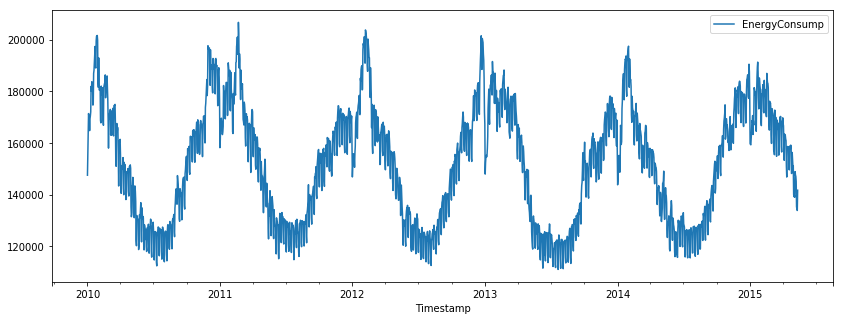

In [40]:
ts.ix['2010-01-01':'2015-05-27', range(1)].plot(figsize=(14, 5))

За год:

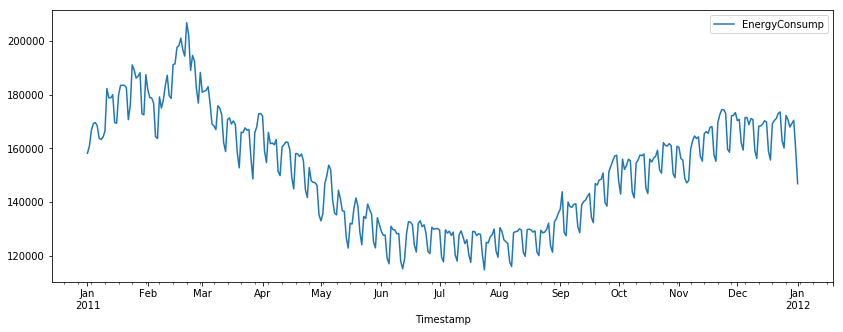

In [9]:
ts.ix['2011-01-01':'2012-01-01', range(1)].plot(figsize=(14, 5))

За месяц:

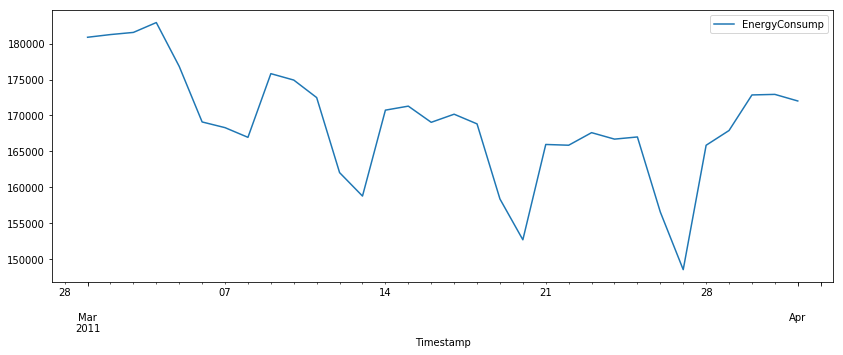

In [10]:
ts.ix['2011-03-01':'2011-04-01', range(1)].plot(figsize=(14, 5))

## Авторегрессия

In [11]:
sc.linalg.hankel([1,2,3,4], [4,7,7,8,9])

array([[1, 2, 3, 4, 7],
       [2, 3, 4, 7, 7],
       [3, 4, 7, 7, 8],
       [4, 7, 7, 8, 9]])

In [12]:
def get_autoregrmatrix(x,h,K):
    L = len(x)
    X = sc.linalg.hankel(x[:L-h-K+1], x[-K:])
    y = x[K+h-1:]
    return X,y

### Прогноз следующий день (h=1) с окном истории - две недели (K=14)

In [13]:
K=14
h = 1 # delay

x_train = ts['EnergyConsump'].loc['2013-01-01':'2014-01-01']
x_test = ts['EnergyConsump'].loc['2014-01-01':'2015-01-01']

X_train, y_train = get_autoregrmatrix(x_train,h,K)
X_test, y_test = get_autoregrmatrix(x_test,h,K)

# frc_ts['EnergyCons'] = SimpleExponentialSmoothing(x, h, Params)

In [14]:
print(X_train.shape)
print(y_train.shape)

(352, 14)
(352,)


In [15]:
# матрица объекты-признаки при авторегрессионном прогнозе
X_train

array([[ 147921.814,  152339.794,  154427.406, ...,  170202.688,
         167247.344,  178034.943],
       [ 152339.794,  154427.406,  155180.414, ...,  167247.344,
         178034.943,  182413.668],
       [ 154427.406,  155180.414,  154553.628, ...,  178034.943,
         182413.668,  182514.118],
       ..., 
       [ 177637.351,  173430.486,  174917.795, ...,  161410.255,
         158815.883,  168857.016],
       [ 173430.486,  174917.795,  173213.975, ...,  158815.883,
         168857.016,  155483.456],
       [ 174917.795,  173213.975,  164150.622, ...,  168857.016,
         155483.456,  143759.782]])

In [16]:
# целевой вектор
y_train

Timestamp
2013-01-15    182413.668
2013-01-16    182514.118
2013-01-17    183676.872
2013-01-18    186329.990
2013-01-19    179645.086
2013-01-20    178568.793
2013-01-21    191561.146
2013-01-22    187921.929
2013-01-23    187581.298
2013-01-24    185272.129
2013-01-25    182949.866
2013-01-26    175483.758
2013-01-27    175307.957
2013-01-28    187067.676
2013-01-29    182235.148
2013-01-30    179343.465
2013-01-31    175382.028
2013-02-01    180344.299
2013-02-02    167171.282
2013-02-03    164472.723
2013-02-04    177323.036
2013-02-05    175805.482
2013-02-06    174946.279
2013-02-07    172110.873
2013-02-08    175624.575
2013-02-09    167667.540
2013-02-10    166157.526
2013-02-11    179963.490
2013-02-12    180527.261
2013-02-13    179296.466
                 ...    
2013-12-03    171136.686
2013-12-04    175269.640
2013-12-05    172410.891
2013-12-06    172667.555
2013-12-07    164749.963
2013-12-08    162403.785
2013-12-09    175016.003
2013-12-10    177503.600
2013-12-11    1

MAPE_train: 0.0154869122653
MAPE_test: 0.0159241134884
MSE_train: 9157793.74268
MSE_test: 10473044.6067


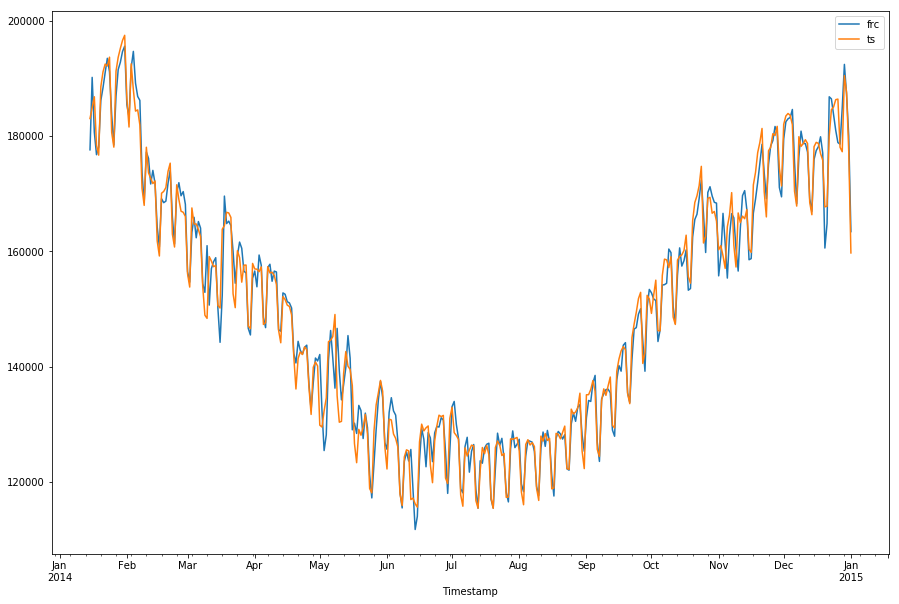

In [17]:
linear_regression = LinearRegression()
linear_regression.fit(X_train,y_train)
pd.DataFrame({'ts':y_test, 'frc': linear_regression.predict(X_test)}).plot(figsize=(15,10))
print('MAPE_train:', qualityMAPE(linear_regression.predict(X_train), y_train))
print('MAPE_test:', qualityMAPE(linear_regression.predict(X_test), y_test))
print('MSE_train:', qualityMSE(linear_regression.predict(X_train), y_train))
print('MSE_test:', qualityMSE(linear_regression.predict(X_test), y_test))

### Прогноз неделю (h=7) с окном истории - две недели (K=14)

MAPE_train: 0.027354912914
MAPE_test: 0.0289165610568
MSE_train: 28814985.0853
MSE_test: 32737511.9823


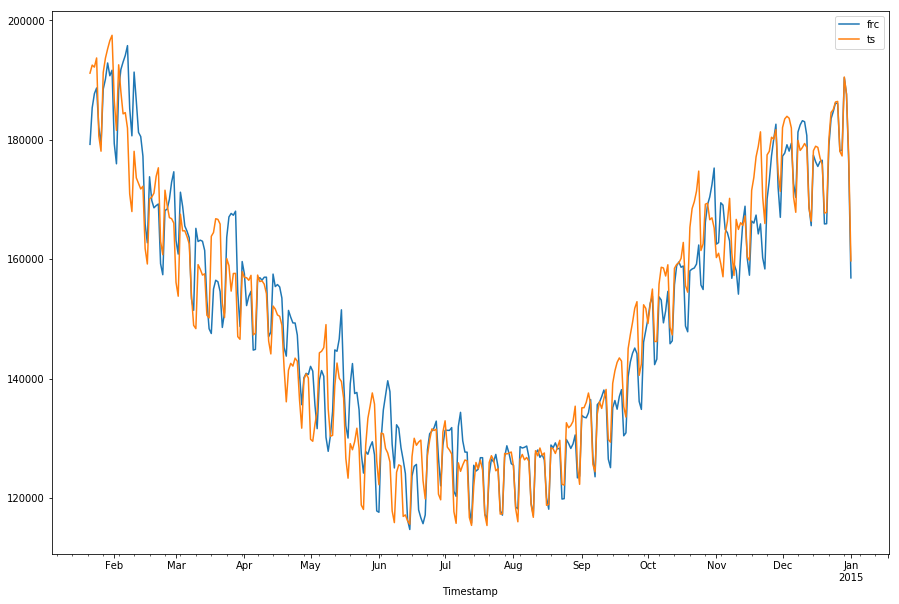

In [37]:
K=14
h = 7 # delay

x_train = ts['EnergyConsump'].loc['2013-01-01':'2014-01-01']
x_test = ts['EnergyConsump'].loc['2014-01-01':'2015-01-01']

X_train, y_train = get_autoregrmatrix(x_train,h,K)
X_test, y_test = get_autoregrmatrix(x_test,h,K)
linear_regression = LinearRegression()
linear_regression.fit(X_train,y_train)


pd.DataFrame({'ts':y_test, 'frc': linear_regression.predict(X_test)}).plot(figsize=(15,10))
print('MAPE_train:', qualityMAPE(linear_regression.predict(X_train), y_train))
print('MAPE_test:', qualityMAPE(linear_regression.predict(X_test), y_test))
print('MSE_train:', qualityMSE(linear_regression.predict(X_train), y_train))
print('MSE_test:', qualityMSE(linear_regression.predict(X_test), y_test))

### Прогноз на две недели (h=14) с окном истории - месяц (K=30)

MAPE_train: 0.0312950982866
MAPE_test: 0.0380258508627
MSE_train: 37126067.1705
MSE_test: 67689234.9044


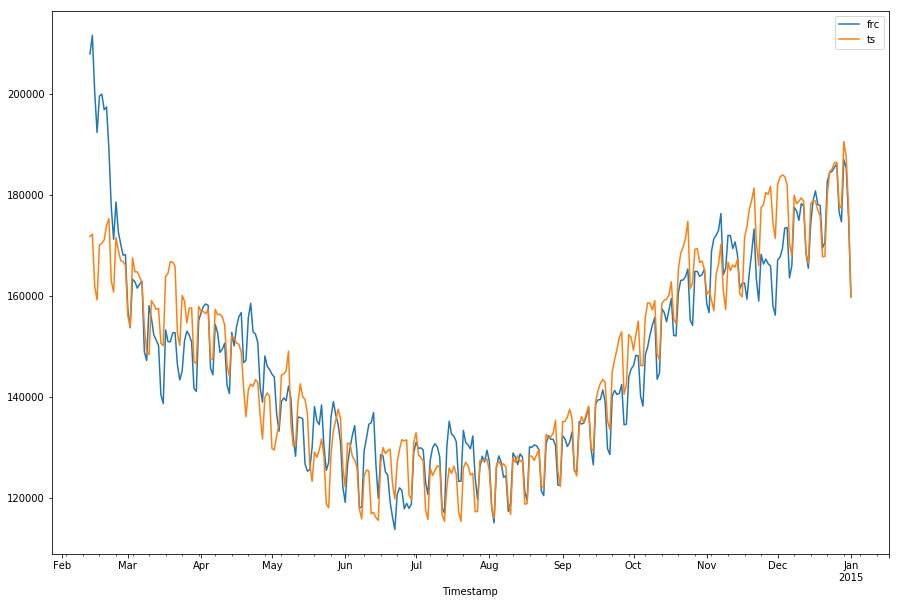

In [19]:
K=30
h = 14 # delay

x_train = ts['EnergyConsump'].ix['2013-01-01':'2014-01-01']
x_test = ts['EnergyConsump'].ix['2014-01-01':'2015-01-01']

X_train, y_train = get_autoregrmatrix(x_train,h,K)
X_test, y_test = get_autoregrmatrix(x_test,h,K)
linear_regression = LinearRegression()
linear_regression.fit(X_train,y_train)


pd.DataFrame({'ts':y_test, 'frc': linear_regression.predict(X_test)}).plot(figsize=(15,10))
print('MAPE_train:', qualityMAPE(linear_regression.predict(X_train), y_train))
print('MAPE_test:', qualityMAPE(linear_regression.predict(X_test), y_test))
print('MSE_train:', qualityMSE(linear_regression.predict(X_train), y_train))
print('MSE_test:', qualityMSE(linear_regression.predict(X_test), y_test))

 ** Неплохо но и не идеально **

## Насколько важные параметры мы отбросили?

In [20]:
ts=energy_ts
ts['Date']=pd.to_datetime(ts['Date'])
ts=ts.rename(columns={'Date':'Timestamp'})
ts=ts.set_index('Timestamp')
ts

c:\users\belna\miniconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,EnergyConsump,Temp1,Temp2,Saturday,Sunday
Timestamp,,,,,
2010-01-01,147487.171,-17.8,-16.9,0.0,1.0
2010-01-02,155433.800,-17.8,-20.3,1.0,0.0
2010-01-03,164140.232,-16.4,-24.0,0.0,1.0
2010-01-04,171382.848,-10.2,-15.7,0.0,1.0
2010-01-05,170188.290,-7.2,-8.8,0.0,1.0
2010-01-06,168969.315,-8.0,-18.6,0.0,1.0
2010-01-07,164772.821,-9.7,-19.5,0.0,1.0
2010-01-08,169338.900,-13.3,-18.0,0.0,1.0
2010-01-09,170479.031,-15.9,-22.3,1.0,0.0


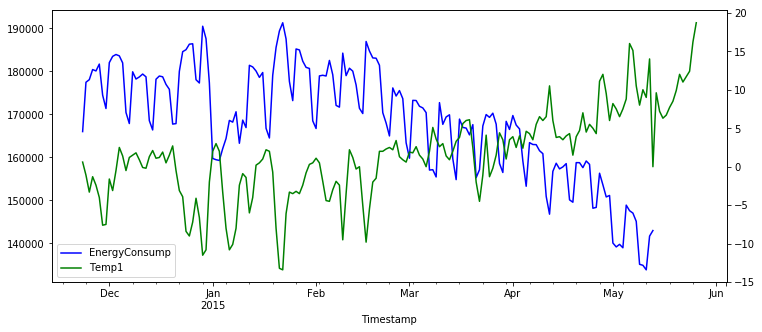

In [21]:
fig, ax = plt.subplots(figsize=(15,5))
ax3 = ax.twinx() #совмещаем оси
#ax3.set_position(('axes', 1.25))
ax3.set_frame_on(True)
ax3.patch.set_visible(False)
fig.subplots_adjust(right=0.75)

ts['EnergyConsump'].tail(186).plot(ax = ax,  style='b-')
ts['Temp1'].tail(186).plot(ax = ax3,  style='g-')

lines = ax.get_lines() + ax3.get_lines()
ax.legend(lines, [l.get_label() for l in lines], loc='lower left')

Похоже, что чем выше температура, тем ниже энергопотребление.

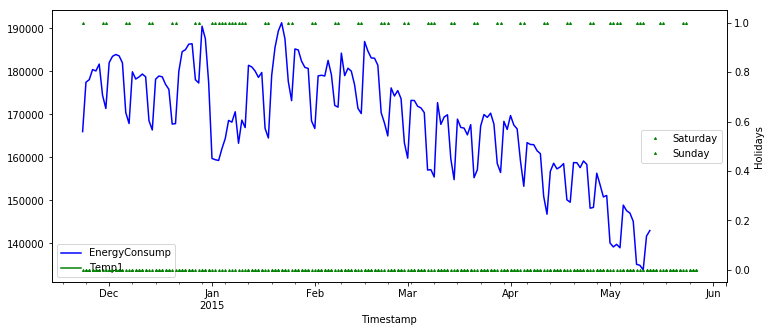

In [22]:
fig, ax = plt.subplots(figsize=(15,5))
ax2= ax.twinx()
ax2.set_ylabel('Holidays')
fig.subplots_adjust(right=0.75)

ts['EnergyConsump'].tail(186).plot(ax = ax,  style='b-')
ts[['Saturday', 'Sunday']].tail(186).plot(ax = ax2, style='g', marker = '^', markersize = 2.0, linewidth=0.0)
ax.legend(lines, [l.get_label() for l in lines], loc='lower left')

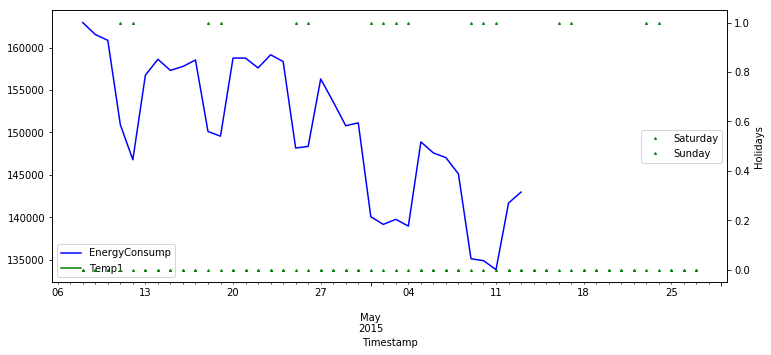

In [23]:
fig, ax = plt.subplots(figsize=(15,5))
ax2= ax.twinx()
ax2.set_ylabel('Holidays')
fig.subplots_adjust(right=0.75)

ts['EnergyConsump'].tail(50).plot(ax = ax,  style='b-')
ts[['Saturday', 'Sunday']].tail(50).plot(ax = ax2, style='g', marker = '^', markersize = 2.0, linewidth=0.0)
ax.legend(lines, [l.get_label() for l in lines], loc='lower left')

Похоже, что в выходные энергопотребление значительно падает.

## Рассмотрим нашу задачу как задачу регрессии

In [24]:
ts.head()

,EnergyConsump,Temp1,Temp2,Saturday,Sunday
Timestamp,,,,,
2010-01-01,147487.171,-17.8,-16.9,0.0,1.0
2010-01-02,155433.800,-17.8,-20.3,1.0,0.0
2010-01-03,164140.232,-16.4,-24.0,0.0,1.0
2010-01-04,171382.848,-10.2,-15.7,0.0,1.0
2010-01-05,170188.290,-7.2,-8.8,0.0,1.0


### По температуре и дню недели определить расход электроенергии

То есть имея прогноз погоды и календарь выходных можно ли оценить расход электроенергии в любой день?

MAPE_train: 0.040739693945
MAPE_test: 0.0488250812373
MSE_train: 54492973.5178
MSE_test: 75540298.0178


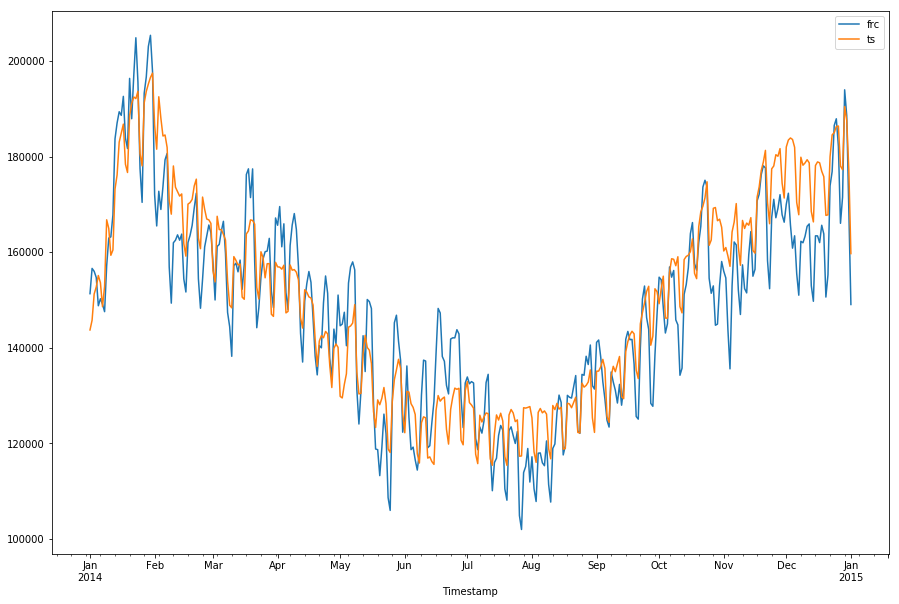

In [25]:
y_train = ts['EnergyConsump'].loc['2013-01-01':'2014-01-01']
y_test = ts['EnergyConsump'].loc['2014-01-01':'2015-01-01']

X_train = ts[['Temp1','Temp2','Saturday','Sunday']].loc['2013-01-01':'2014-01-01']
X_test = ts[['Temp1','Temp2','Saturday','Sunday']].loc['2014-01-01':'2015-01-01']

linear_regression = LinearRegression()
linear_regression.fit(X_train,y_train)


pd.DataFrame({'ts':y_test, 'frc': linear_regression.predict(X_test)}).plot(figsize=(15,10))
print('MAPE_train:', qualityMAPE(linear_regression.predict(X_train), y_train))
print('MAPE_test:', qualityMAPE(linear_regression.predict(X_test), y_test))
print('MSE_train:', qualityMSE(linear_regression.predict(X_train), y_train))
print('MSE_test:', qualityMSE(linear_regression.predict(X_test), y_test))

Оказывается, такая постановка тоже имеет право на существование. Хотя, результаты получаются хуже. Это вполне объяснимо: кроме темпиратуры и дня недели на потребление электроэнерги могут влиять и другие факторы.

## А можно придумать разумную постановку в виде задачи классификации?

Например, вполне можно представить, что наша основная задача - понять, будет ли расход энергии сегодня выше чем завтра. Для примера сделаем все "вручную".

In [26]:
energy_ts = pd.read_csv('energy_consump.csv')
energy_ts= energy_ts[(energy_ts['ZSP']=='FZSZOE27') & (energy_ts['Hub']=='Center')]
energy_ts=energy_ts[['Date','EnergyConsump','Temp1','Temp2','Saturday','Sunday']]
energy_ts.head()

,Date,EnergyConsump,Temp1,Temp2,Saturday,Sunday
0,2010-01-01,147487.171,-17.8,-16.9,0.0,1.0
1,2010-01-02,155433.800,-17.8,-20.3,1.0,0.0
2,2010-01-03,164140.232,-16.4,-24.0,0.0,1.0
3,2010-01-04,171382.848,-10.2,-15.7,0.0,1.0
4,2010-01-05,170188.290,-7.2,-8.8,0.0,1.0


Создадим столбец класса, а также признаки-разности:

Найдем знак разности между значениями следующего дня и этого:

In [27]:
classList=list(np.sign(np.array(energy_ts['EnergyConsump'][1:])-np.array(energy_ts['EnergyConsump'][:-1])))
DeltaTemp1=list(np.array(energy_ts['Temp1'][1:])-np.array(energy_ts['Temp1'][:-1]))
DeltaTemp2=list(np.array(energy_ts['Temp2'][1:])-np.array(energy_ts['Temp2'][:-1]))
DeltaSat=list(np.array(energy_ts['Saturday'][1:])-np.array(energy_ts['Saturday'][:-1]))
DeltaSun=list(np.array(energy_ts['Sunday'][1:])-np.array(energy_ts['Sunday'][:-1]))

c:\users\belna\miniconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sign
  """Entry point for launching an IPython kernel.


В этом списке элементов на 1 меньше, чем необходимо. Дополним произвольным элементом (потом отбросим)

In [28]:
classList.append(0)
DeltaTemp1.append(0)
DeltaTemp2.append(0)
DeltaSat.append(0)
DeltaSun.append(0)

Вставим столбец

In [29]:
energy_ts.insert(loc=2,column='Class', value=classList)
energy_ts.insert(loc=2,column='DeltaTemp1', value=DeltaTemp1)
energy_ts.insert(loc=2,column='DeltaTemp2', value=DeltaTemp2)
energy_ts.insert(loc=2,column='DeltaSat', value=DeltaSat)
energy_ts.insert(loc=2,column='DeltaSun', value=DeltaSun)
energy_ts.head()

,Date,EnergyConsump,DeltaSun,DeltaSat,DeltaTemp2,DeltaTemp1,Class,Temp1,Temp2,Saturday,Sunday
0,2010-01-01,147487.171,-1.0,1.0,-3.4,0.0,1.0,-17.8,-16.9,0.0,1.0
1,2010-01-02,155433.800,1.0,-1.0,-3.7,1.4,1.0,-17.8,-20.3,1.0,0.0
2,2010-01-03,164140.232,0.0,0.0,8.3,6.2,1.0,-16.4,-24.0,0.0,1.0
3,2010-01-04,171382.848,0.0,0.0,6.9,3.0,-1.0,-10.2,-15.7,0.0,1.0
4,2010-01-05,170188.290,0.0,0.0,-9.8,-0.8,-1.0,-7.2,-8.8,0.0,1.0


Получилось! Теперь избавимся от всех строк, где класс не 1 и не -1

In [30]:
energy_ts=energy_ts[(energy_ts['Class']==1)|(energy_ts['Class']==-1)]
energy_ts

,Date,EnergyConsump,DeltaSun,DeltaSat,DeltaTemp2,DeltaTemp1,Class,Temp1,Temp2,Saturday,Sunday
0,2010-01-01,147487.171,-1.0,1.0,-3.4,0.0,1.0,-17.8,-16.9,0.0,1.0
1,2010-01-02,155433.800,1.0,-1.0,-3.7,1.4,1.0,-17.8,-20.3,1.0,0.0
2,2010-01-03,164140.232,0.0,0.0,8.3,6.2,1.0,-16.4,-24.0,0.0,1.0
3,2010-01-04,171382.848,0.0,0.0,6.9,3.0,-1.0,-10.2,-15.7,0.0,1.0
4,2010-01-05,170188.290,0.0,0.0,-9.8,-0.8,-1.0,-7.2,-8.8,0.0,1.0
5,2010-01-06,168969.315,0.0,0.0,-0.9,-1.7,-1.0,-8.0,-18.6,0.0,1.0
6,2010-01-07,164772.821,0.0,0.0,1.5,-3.6,1.0,-9.7,-19.5,0.0,1.0
7,2010-01-08,169338.900,-1.0,1.0,-4.3,-2.6,1.0,-13.3,-18.0,0.0,1.0
8,2010-01-09,170479.031,1.0,-1.0,4.3,3.2,1.0,-15.9,-22.3,1.0,0.0
9,2010-01-10,172054.265,-1.0,0.0,9.0,6.2,1.0,-12.7,-18.0,0.0,1.0


Пора запускать алгоритм классификации. Правда, на обучение и контроль по-прежнему лучше делить с учетом хронологии.

In [31]:
t=1500

y_train = energy_ts['Class'][:t]
y_test = energy_ts['Class'][t:]

X_train = energy_ts[['DeltaSun','DeltaSat','DeltaTemp1','DeltaTemp2']][:t]
X_test = energy_ts[['DeltaSun','DeltaSat','DeltaTemp1','DeltaTemp2']][t:]

In [32]:
from sklearn.metrics import accuracy_score

In [33]:
cl=LogisticRegression(penalty='l2')
cl.fit(X_train,y_train)
print('Train:', accuracy_score(cl.predict(X_train),y_train))
print('Test:', accuracy_score(cl.predict(X_test),y_test))

Train: 0.722
Test: 0.700873362445


**Точность не гениальная, но достаточная чтобы утверждать, что постановка имеет право на существование :)**

## Вывод:

Данные и прикладная задача, конечно, подсказывают нам постановку задачи машинного обучения, но не навязывают ее.

## Домашнее заданее

- Для рассмотренной в семинаре задачи прогнозирования энергопотребления построить модель, совмещающую в себе подходы временных рядов и регрессии.
- Сравнить качество ее работы с работой предложенных в семинаре моделей регрессии и временного ряда.